In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("../data/loan_default.csv")

In [4]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


<Axes: >

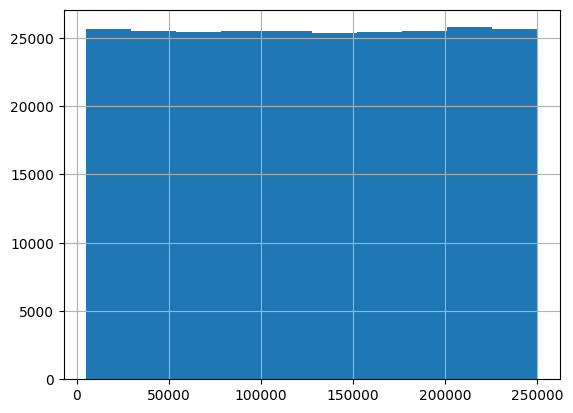

In [5]:
data["LoanAmount"].hist()

<Axes: >

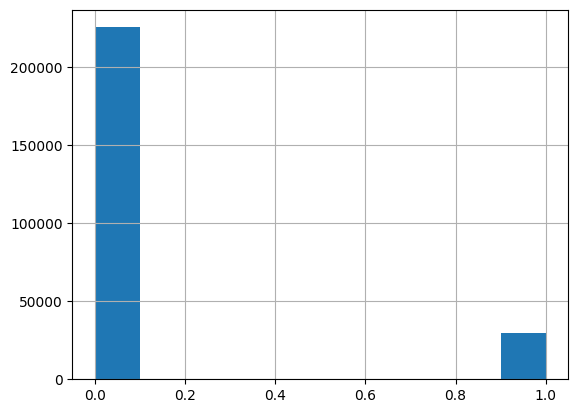

In [6]:
data["Default"].hist()

### Balance Data set

In [7]:
(data["Default"] == 1).sum()

np.int64(29653)

In [11]:
num_0 = (data["Default"] == 0).sum()
num_1 = (data["Default"] == 1).sum()

In [20]:
to_remove = data[(data["Default"] == 0)].sample(num_0 - num_1)

In [22]:
data.drop(to_remove.index, inplace=True)

<Axes: >

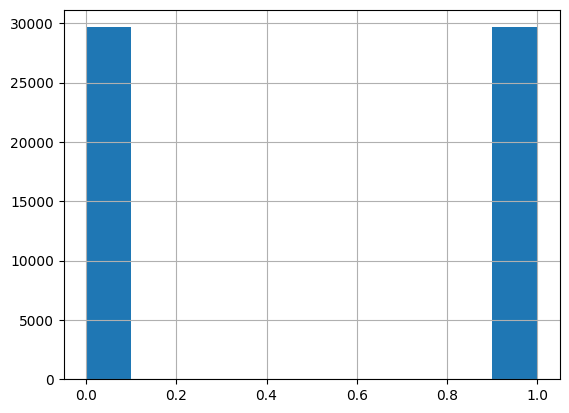

In [23]:
data["Default"].hist()

<Axes: >

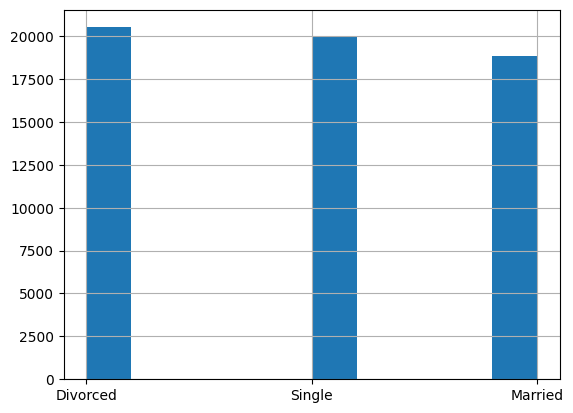

In [25]:
data["MaritalStatus"].hist()

### Create new feature

replace Loan amount with the ratio to income

In [26]:
data["LoanIncomeRatio"] = data["LoanAmount"] / data["Income"]

<Axes: >

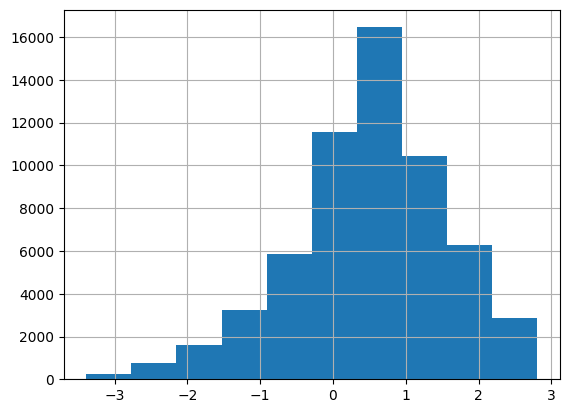

In [31]:
np.log(data["LoanIncomeRatio"]).hist()

In [32]:
data["LogLoanIncomeRatio"] = np.log(data["LoanIncomeRatio"])

In [34]:
data.drop(["LoanAmount", "Income"], axis=1, inplace=True)

In [36]:
data.drop("LoanID", inplace=True, axis=1)

In [38]:
data.head()

,Age,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,LoanIncomeRatio,LogLoanIncomeRatio
2,46,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,1.534154,0.427979
4,60,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,0.447179,-0.804796
5,25,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1,1.001661,0.001660
6,38,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0,1.592123,0.465069
8,36,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1,2.196205,0.786731


In [39]:
data["Education"].unique()

array(["Master's", "Bachelor's", 'High School', 'PhD'], dtype=object)

In [40]:
data["LoanTerm"].describe()

count    59306.000000
mean        36.012747
std         16.995364
min         12.000000
25%         24.000000
50%         36.000000
75%         48.000000
max         60.000000
Name: LoanTerm, dtype: float64

<Axes: >

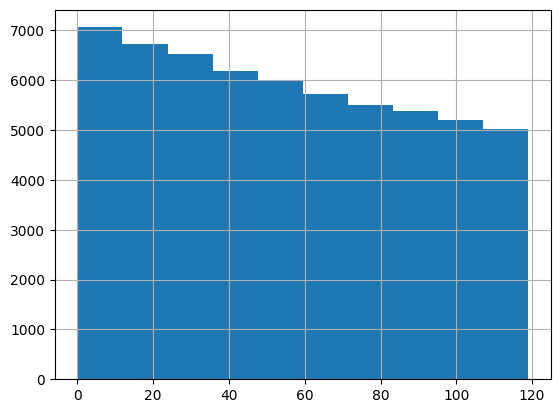

In [43]:
data["MonthsEmployed"].hist()

In [44]:
data["LoanPurpose"].unique()

array(['Auto', 'Business', 'Home', 'Education', 'Other'], dtype=object)

### Let's assume that categorical data has no influence on outcome (for simplicity)

In [ ]:
data.drop(["Education", "MaritalStatus", "LoanPurpose", "EmploymentType"], axis=1, inplace=True)

In [50]:
data.head()

,Age,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,HasDependents,HasCoSigner,Default,LoanIncomeRatio,LogLoanIncomeRatio
2,46,451,26,3,21.17,24,0.31,Yes,Yes,No,1,1.534154,0.427979
4,60,633,8,4,6.51,48,0.73,No,Yes,No,0,0.447179,-0.804796
5,25,720,18,2,22.72,24,0.10,Yes,No,Yes,1,1.001661,0.001660
6,38,429,80,1,19.11,12,0.16,Yes,No,Yes,0,1.592123,0.465069
8,36,827,83,1,23.94,48,0.20,Yes,No,No,1,2.196205,0.786731


In [53]:
data["HasMortgage"] = (data["HasMortgage"] == "Yes").astype(np.int8)
data["HasCoSigner"] = (data["HasCoSigner"] == "Yes").astype(np.int8)
data["HasDependents"] = (data["HasDependents"] == "Yes").astype(np.int8)


In [54]:
data

,Age,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,HasDependents,HasCoSigner,Default,LoanIncomeRatio,LogLoanIncomeRatio
2,46,451,26,3,21.17,24,0.31,1,1,0,1,1.534154,0.427979
4,60,633,8,4,6.51,48,0.73,0,1,0,0,0.447179,-0.804796
5,25,720,18,2,22.72,24,0.10,1,0,1,1,1.001661,0.001660
6,38,429,80,1,19.11,12,0.16,1,0,1,0,1.592123,0.465069
8,36,827,83,1,23.94,48,0.20,1,0,0,1,2.196205,0.786731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255332,67,734,90,2,14.30,60,0.53,0,0,1,0,1.599519,0.469703
255333,22,545,99,1,21.86,12,0.52,1,1,0,1,0.951289,-0.049937
255341,40,701,38,3,9.91,24,0.23,1,0,1,1,0.893980,-0.112072
255343,32,511,14,2,11.55,24,0.21,0,0,0,1,3.655208,1.296153


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train, test = train_test_split(data)

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
clf = RandomForestClassifier()

In [59]:
trainX = train[["Age", "CreditScore", "MonthsEmployed", "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio", "HasMortgage", "HasDependents", "HasCoSigner", "LoanIncomeRatio", "LogLoanIncomeRatio"]]
trainY = train["Default"]

In [60]:
testX = test[["Age", "CreditScore", "MonthsEmployed", "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio", "HasMortgage", "HasDependents", "HasCoSigner", "LoanIncomeRatio", "LogLoanIncomeRatio"]]
testY = test["Default"]

In [62]:
clf.fit(trainX, trainY)

RandomForestClassifier()

In [63]:
(clf.predict(trainX) == trainY).mean()

np.float64(1.0)

In [64]:
(clf.predict(testX) == testY).mean()

np.float64(0.6739731570783031)

In [65]:
import pickle

In [67]:
pickle.dump(clf, open("../models/loan_default_model.pkl", "wb"))